In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("./data/train.csv", index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
age               29305 non-null int64
workclass         29305 non-null object
fnlwgt            29305 non-null int64
education         29305 non-null object
education-num     29305 non-null int64
marital-status    29305 non-null object
occupation        29305 non-null object
relationship      29305 non-null object
race              29305 non-null object
sex               29305 non-null object
capital-gain      29305 non-null int64
capital-loss      29305 non-null int64
hours-per-week    29305 non-null int64
native-country    29305 non-null object
income            29305 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
age               19537 non-null int64
workclass         19537 non-null object
fnlwgt            19537 non-null int64
education        

In [4]:
train.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
6,66,Self-emp-not-inc,274451,9th,5,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,25,United-States,1
7,56,Private,152874,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,1741,40,United-States,0
8,70,Self-emp-not-inc,165586,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
9,21,Private,211013,Assoc-voc,11,Married-civ-spouse,Other-service,Other-relative,White,Female,0,0,50,Mexico,0


In [5]:
# train
train.loc[:, 'sex'].replace(' Male', 1, inplace=True)
train.loc[:, 'sex'].replace(' Female', 0, inplace=True)
# test
test.loc[:, 'sex'].replace(' Male', 1, inplace=True)
test.loc[:, 'sex'].replace(' Female', 0, inplace=True)

In [6]:
# 혼인 여부 정수화(marital-status)
train['marital-status'][train['marital-status']!=' Married-civ-spouse'] = 0
train['marital-status'][train['marital-status']==' Married-civ-spouse'] = 1

test['marital-status'][test['marital-status']!=' Married-civ-spouse'] = 0
test['marital-status'][test['marital-status']==' Married-civ-spouse'] = 1

train['marital-status'] = train['marital-status'].astype('int64')
test['marital-status'] = test['marital-status'].astype('int64')


C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Use

In [7]:
# relationship 정수화
train['relationship'][(train['relationship']!=' Husband') & (train['relationship']!=' Wife')] = 0
train['relationship'][(train['relationship']==' Husband') | (train['relationship']==' Wife')] = 1

test['relationship'][(test['relationship']!=' Husband') & (test['relationship']!=' Wife')] = 0
test['relationship'][(test['relationship']==' Husband') | (test['relationship']==' Wife')] = 1

train['relationship'] = train['relationship'].astype('int64')
test['relationship'] = test['relationship'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Use

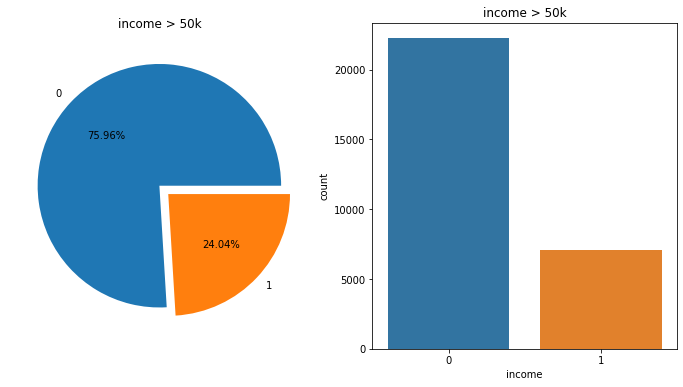

In [8]:
f, ax = plt.subplots(1,2,figsize=(12,6))

train['income'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('income > 50k')
ax[0].set_ylabel('')

sns.countplot('income', data=train, ax=ax[1])
ax[1].set_title('income > 50k')
plt.show()

In [79]:
train.groupby('workclass').mean()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
workclass,,,,,,,,,,,
?,40.337342,188229.526158,9.262778,0.333734,0.0,0.334336,0.545400,560.636801,76.977751,32.006615,0.105232
Federal-gov,42.725995,184095.443794,10.926230,0.480094,0.0,0.496487,0.665105,919.757611,120.443794,41.750585,0.382904
Local-gov,41.559422,188656.313169,11.047645,0.488758,0.0,0.372056,0.604390,591.854925,110.760171,40.796574,0.299251
Never-worked,18.600000,175487.800000,6.200000,0.000000,0.0,0.400000,0.600000,0.000000,0.000000,26.000000,0.000000
Private,36.917981,192842.711710,9.876580,0.423175,0.0,0.280059,0.658746,907.441156,78.609603,40.286673,0.219402
Self-emp-inc,45.609929,182642.724417,11.193516,0.763931,0.0,0.106383,0.882472,5410.427558,157.046606,48.716312,0.554205
Self-emp-not-inc,45.513232,175545.089805,10.257267,0.660304,0.0,0.159219,0.842516,1851.702820,113.905423,44.418221,0.278959
State-gov,39.618651,177887.604496,11.409659,0.443797,0.0,0.358035,0.621982,688.802664,76.552040,38.936719,0.262281
Without-pay,50.750000,184202.333333,8.833333,0.583333,0.0,0.166667,0.750000,201.166667,0.000000,33.000000,0.083333


In [80]:
train.groupby('occupation').mean()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
occupation,,,,,,,,,,,
?,40.272182,188191.331535,9.253597,0.332734,0.0,0.334532,0.545564,558.956235,76.747002,31.988609,0.104916
Adm-clerical,37.245349,192163.925581,10.102616,0.260174,0.0,0.368605,0.323837,410.327326,65.946802,37.722384,0.133140
Armed-Forces,30.000000,201244.500000,9.900000,0.500000,0.0,0.300000,1.000000,0.000000,188.700000,39.400000,0.300000
Craft-repair,38.979075,190916.503029,9.141795,0.616189,0.0,0.210352,0.943007,717.620870,83.889317,42.260463,0.225771
Exec-managerial,42.262677,188359.308396,11.446107,0.595733,0.0,0.185924,0.716819,2277.922970,130.026600,45.018565,0.481851
Farming-fishing,41.099099,173612.060811,8.594595,0.573198,0.0,0.156532,0.938063,779.186937,63.577703,47.092342,0.106982
Handlers-cleaners,32.859087,202844.796637,8.575661,0.346677,0.0,0.334668,0.878303,260.909528,55.550841,38.339472,0.066453
Machine-op-inspct,37.957482,194173.864163,8.490889,0.488680,0.0,0.385422,0.741579,349.891773,66.330204,40.773054,0.131971
Other-service,35.313950,187788.127395,8.772101,0.223529,0.0,0.453109,0.460840,210.418151,39.333445,34.909580,0.043361


In [33]:
races = train.loc[:,'race'].unique()
for i in range(len(races)):
    train.replace(races[i], i, inplace=True)

In [37]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,0,Machine-op-inspct,0,0,1,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,0,Other-service,0,0,0,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,0,Handlers-cleaners,0,1,0,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,0,Tech-support,0,0,0,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,1,Transport-moving,0,0,1,0,0,70,United-States,1


In [38]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,0,?,0,0,1,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,1,Other-service,0,0,0,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,1,Tech-support,0,1,1,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,1,Exec-managerial,0,0,1,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,1,Exec-managerial,0,0,0,0,1902,40,United-States


In [39]:
train["race"].value_counts() # 결측치 other

0    25081
2     2776
1      919
3      290
4      239
Name: race, dtype: int64

In [82]:
train["workclass"].value_counts() # 결측치 ?

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [89]:
train["education-num"].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

In [91]:
train["education"].value_counts()

 HS-grad         9435
 Some-college    6558
 Bachelors       4848
 Masters         1587
 Assoc-voc       1230
 11th            1057
 Assoc-acdm       980
 10th             816
 7th-8th          574
 Prof-school      500
 9th              430
 12th             415
 Doctorate        347
 5th-6th          334
 1st-4th          148
 Preschool         46
Name: education, dtype: int64

In [96]:
education = train.loc[:,'education'].unique()
for i in range(len(education)):
    train.replace(education[i], i, inplace=True)

In [109]:
for i in range(len(col)) : 
    for j in range(i, len(col)) :
        data_ed[col[i]+"x"+col[j]] = data_ed[col[i]] *data_ed[col[j]]

C:\Users\gayeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
data_ed['educationxeducation-num'].head()

no
1     0
2    10
3    26
4    33
5    10
Name: educationxeducation-num, dtype: int64

In [113]:
train["occupation"].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [9]:
occ = pd.get_dummies(train)
occ.head()

,age,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
2,39,52978,10,0,0,0,0,1721,55,0,...,0,0,0,0,0,0,0,1,0,0
3,35,196899,13,0,0,0,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,0,0,0,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
5,24,60783,10,1,1,1,0,0,70,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
col = occ.columns

In [11]:
for i in range(len(col)) : 
    for j in range(i, len(col)) :
        occ[col[i]+"x"+col[j]] = occ[col[i]] *occ[col[j]]

In [12]:
occ.head()

,age,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income,...,native-country_ Trinadad&Tobagoxnative-country_ Trinadad&Tobago,native-country_ Trinadad&Tobagoxnative-country_ United-States,native-country_ Trinadad&Tobagoxnative-country_ Vietnam,native-country_ Trinadad&Tobagoxnative-country_ Yugoslavia,native-country_ United-Statesxnative-country_ United-States,native-country_ United-Statesxnative-country_ Vietnam,native-country_ United-Statesxnative-country_ Yugoslavia,native-country_ Vietnamxnative-country_ Vietnam,native-country_ Vietnamxnative-country_ Yugoslavia,native-country_ Yugoslaviaxnative-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,1,0,0,40,0,...,0,0,0,0,1,0,0,0,0,0
2,39,52978,10,0,0,0,0,1721,55,0,...,0,0,0,0,1,0,0,0,0,0
3,35,196899,13,0,0,0,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,0,0,0,0,0,40,0,...,0,0,0,0,1,0,0,0,0,0
5,24,60783,10,1,1,1,0,0,70,1,...,0,0,0,0,1,0,0,0,0,0


In [123]:
occ.shape

(29305, 3159)

In [23]:
X = train[['age','fnlwgt', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
X_result = test[['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = train['income']

In [24]:
X.head()

,age,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
no,,,,,,,,,
1,25,219199,7,0,0,1,0,0,40
2,39,52978,10,0,0,0,0,1721,55
3,35,196899,13,0,0,0,0,0,50
4,64,135527,11,0,0,0,0,0,40
5,24,60783,10,1,1,1,0,0,70


In [14]:
col = X.columns

In [15]:
for i in range(len(col)) : 
    for j in range(i, len(col)) :
        X[col[i]+"x"+col[j]] = X[col[i]] *X[col[j]]

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
result =pd.concat([pd.DataFrame(X),train[['income']]],axis=1)

In [17]:
result.head()

,age,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,agexage,...,sexxcapital-gain,sexxcapital-loss,sexxhours-per-week,capital-gainxcapital-gain,capital-gainxcapital-loss,capital-gainxhours-per-week,capital-lossxcapital-loss,capital-lossxhours-per-week,hours-per-weekxhours-per-week,income
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,1,0,0,40,625,...,0,0,40,0,0,0,0,0,1600,0
2,39,52978,10,0,0,0,0,1721,55,1521,...,0,0,0,0,0,0,2961841,94655,3025,0
3,35,196899,13,0,0,0,0,0,50,1225,...,0,0,0,0,0,0,0,0,2500,0
4,64,135527,11,0,0,0,0,0,40,4096,...,0,0,0,0,0,0,0,0,1600,0
5,24,60783,10,1,1,1,0,0,70,576,...,0,0,70,0,0,0,0,0,4900,1


In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 55 columns):
age                              29305 non-null int64
fnlwgt                           29305 non-null int64
education-num                    29305 non-null int64
marital-status                   29305 non-null int64
relationship                     29305 non-null int64
sex                              29305 non-null int64
capital-gain                     29305 non-null int64
capital-loss                     29305 non-null int64
hours-per-week                   29305 non-null int64
agexage                          29305 non-null int64
agexfnlwgt                       29305 non-null int64
agexeducation-num                29305 non-null int64
agexmarital-status               29305 non-null int64
agexrelationship                 29305 non-null int64
agexsex                          29305 non-null int64
agexcapital-gain                 29305 non-null int64
agexcapital-loss           

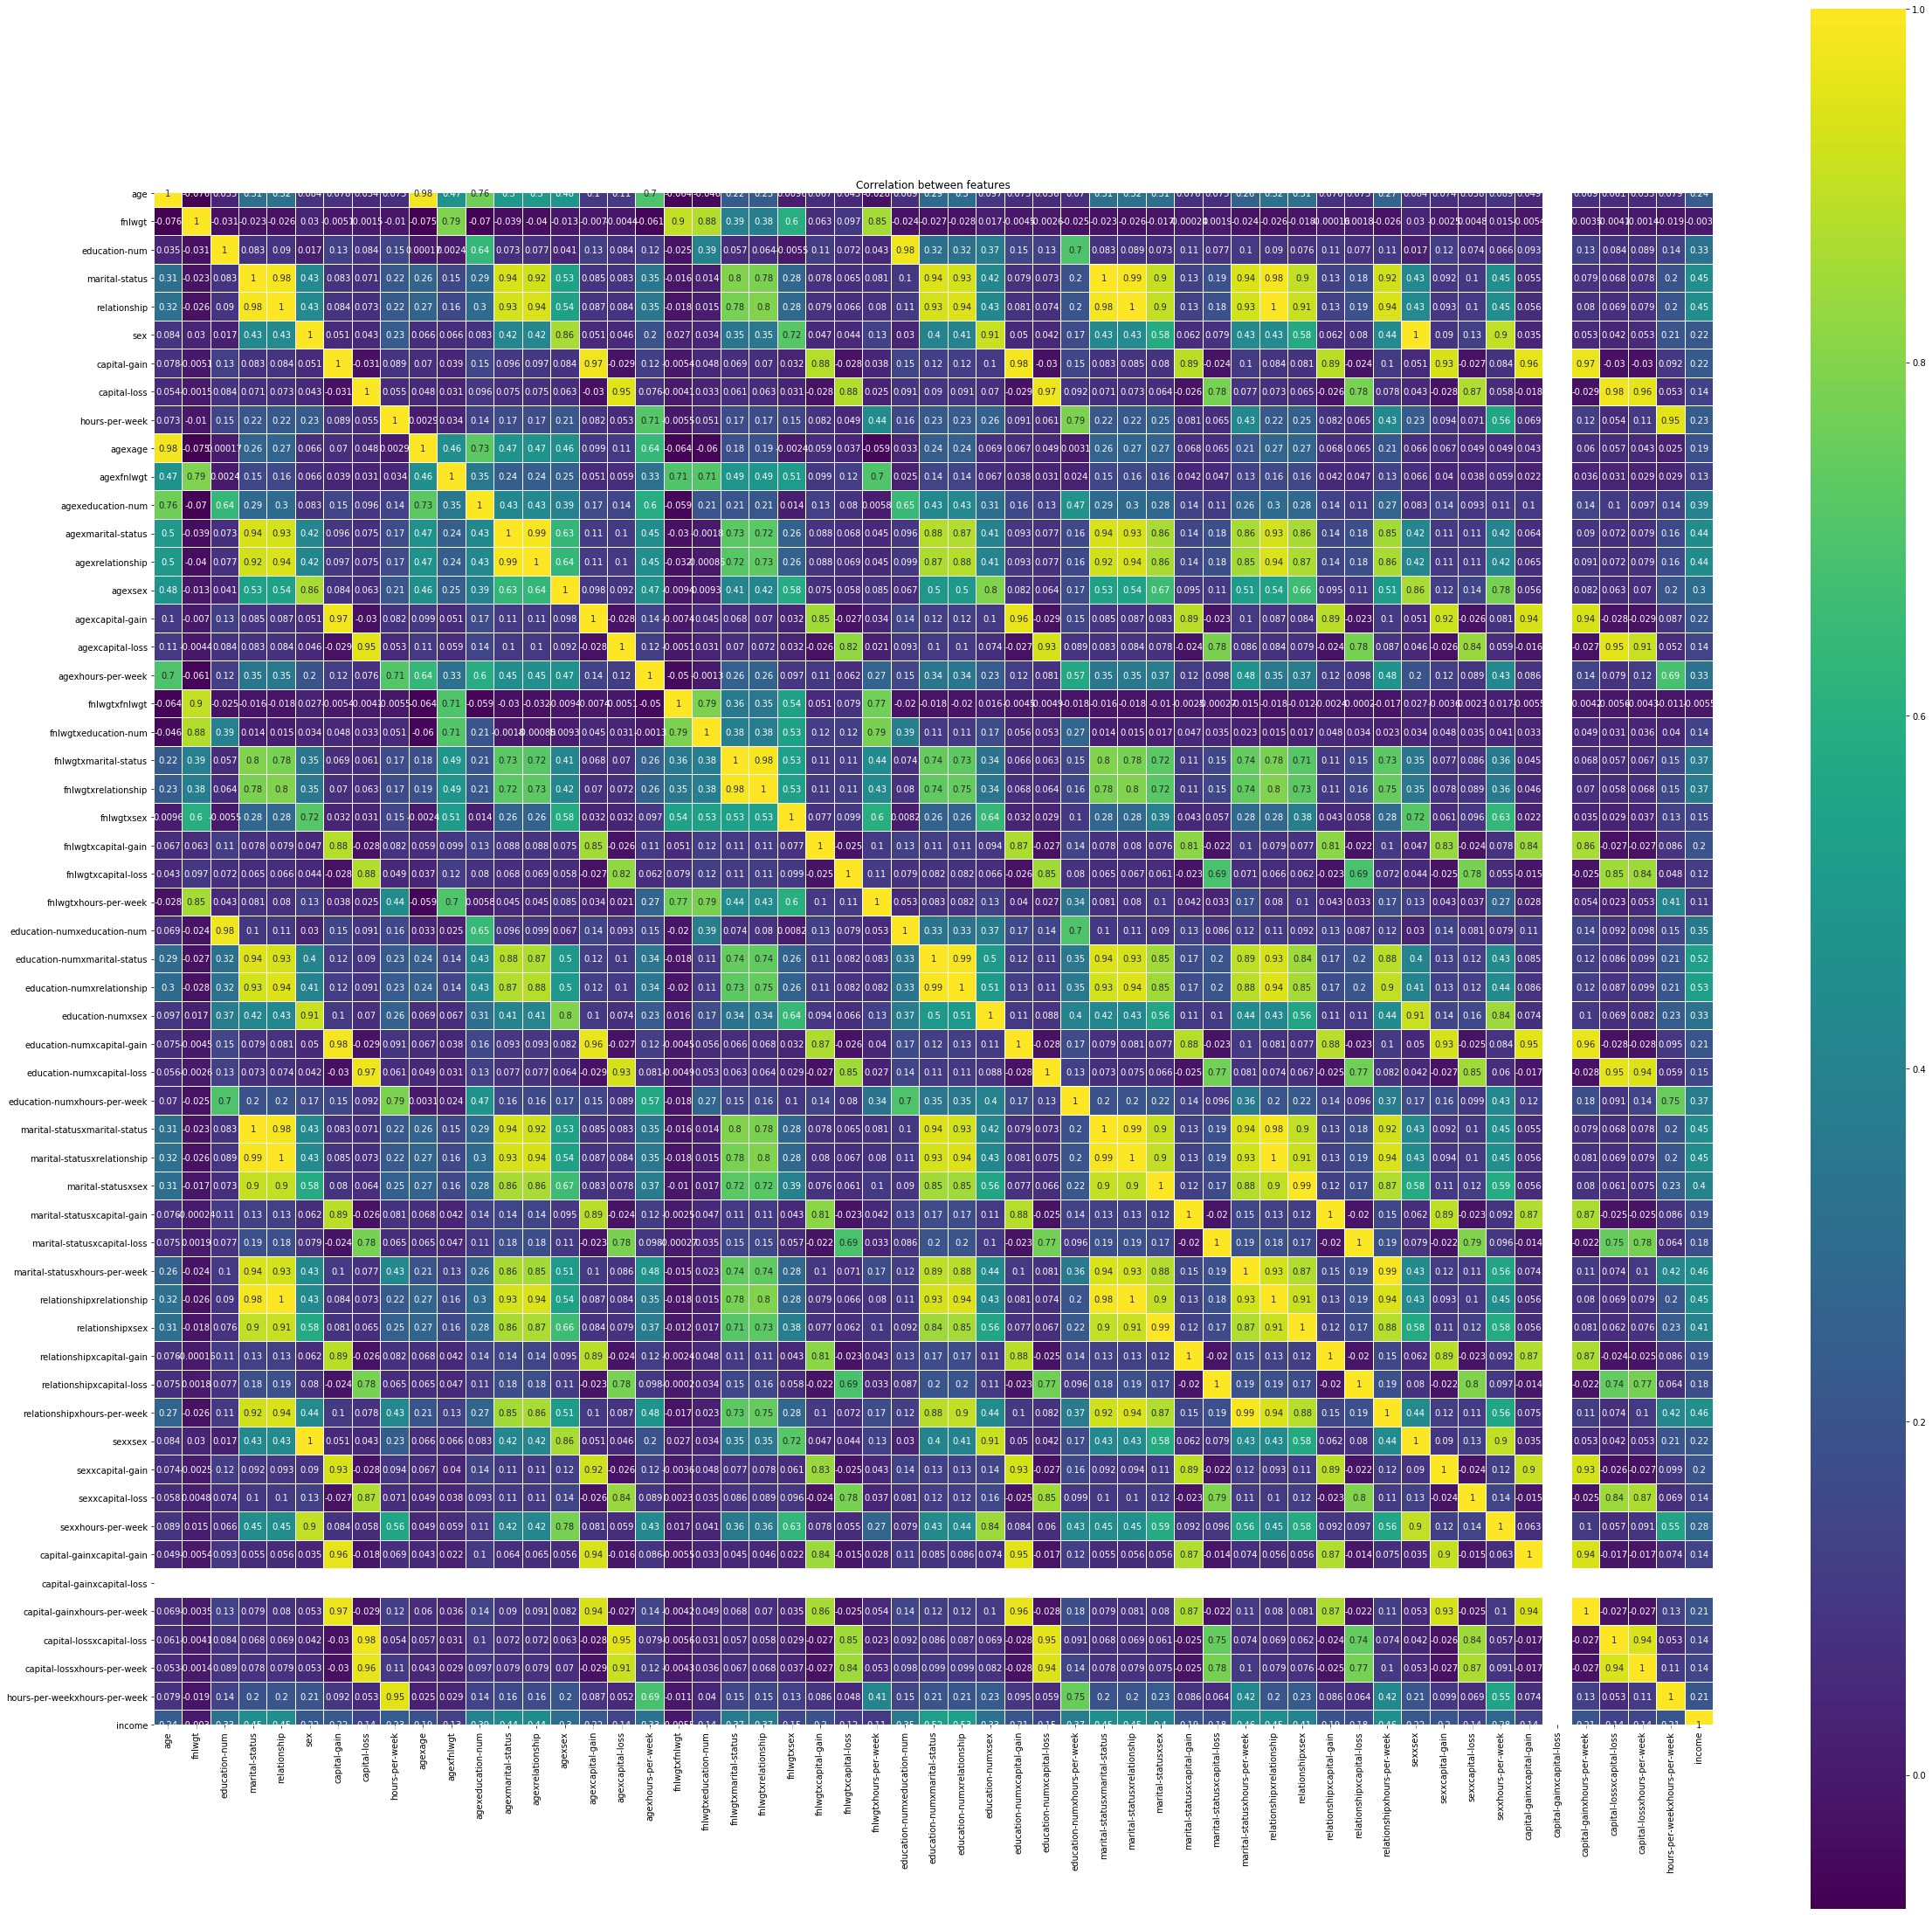

In [18]:
plt.figure(figsize=(40, 40))
sns.heatmap(result.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [22]:
result.corr()['income'][result.corr()['income']>0.2]

age                              0.238460
education-num                    0.331798
marital-status                   0.445836
relationship                     0.449644
sex                              0.215613
capital-gain                     0.221387
hours-per-week                   0.231045
agexeducation-num                0.393711
agexmarital-status               0.442992
agexrelationship                 0.444771
agexsex                          0.304168
agexcapital-gain                 0.215363
agexhours-per-week               0.327105
fnlwgtxmarital-status            0.365436
fnlwgtxrelationship              0.369704
education-numxeducation-num      0.353491
education-numxmarital-status     0.523179
education-numxrelationship       0.525458
education-numxsex                0.327722
education-numxcapital-gain       0.212988
education-numxhours-per-week     0.370661
marital-statusxmarital-status    0.445836
marital-statusxrelationship      0.449196
marital-statusxsex               0

no
1        0
2        0
3        0
4        0
5        1
6        1
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
30       0
        ..
29276    0
29277    0
29278    1
29279    0
29280    1
29281    0
29282    0
29283    1
29284    0
29285    1
29286    0
29287    0
29288    1
29289    0
29290    0
29291    1
29292    0
29293    0
29294    0
29295    1
29296    0
29297    0
29298    1
29299    0
29300    0
29301    0
29302    0
29303    0
29304    0
29305    0
Name: income, Length: 29305, dtype: int64

### 정규화

In [53]:
minMax = MinMaxScaler()
X = minMax.fit_transform(X_train, y_train)
X

C:\Users\gayeon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.39726027, 0.6       , 0.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.34246575, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.34693878],
       [0.16438356, 0.8       , 1.        , ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.26027397, 0.53333333, 0.        , ..., 0.        , 0.        ,
        0.29591837],
       [0.10958904, 0.8       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.1369863 , 0.53333333, 0.        , ..., 0.        , 0.        ,
        0.39795918]])

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train,y_train)
X

C:\Users\gayeon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gayeon\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


array([[ 0.53901606, -0.03747731, -0.91358096, ..., -0.14584404,
        -0.21532828, -0.03526326],
       [ 0.24772664, -2.36356497, -0.91358096, ..., -0.14584404,
        -0.21532828, -0.44164263],
       [-0.69896395,  1.12556653,  1.09459374, ..., -0.14584404,
        -0.21532828, -0.03526326],
       ...,
       [-0.18920748, -0.42515858, -0.91358096, ..., -0.14584404,
        -0.21532828, -0.84802201],
       [-0.99025336,  1.12556653, -0.91358096, ..., -0.14584404,
        -0.21532828,  0.77749548],
       [-0.84460866, -0.42515858, -0.91358096, ..., -0.14584404,
        -0.21532828, -0.03526326]])

In [57]:
scaler = RobustScaler()
X = scaler.fit_transform(X_train,y_train)
X

array([[ 0.45,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.25, -1.5 ,  0.  , ...,  0.  ,  0.  , -1.  ],
       [-0.4 ,  0.75,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.05, -0.25,  0.  , ...,  0.  ,  0.  , -2.  ],
       [-0.6 ,  0.75,  0.  , ...,  0.  ,  0.  ,  2.  ],
       [-0.5 , -0.25,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [58]:
scaler = QuantileTransformer()
X = scaler.fit_transform(X_train,y_train)
X

array([[7.15215215e-01, 5.61561562e-01, 9.99999998e-08, ...,
        9.99999998e-08, 9.99999998e-08, 4.72472472e-01],
       [6.26126126e-01, 2.80280280e-02, 9.99999998e-08, ...,
        9.99999998e-08, 9.99999998e-08, 1.91691692e-01],
       [2.84784785e-01, 8.31831832e-01, 9.99999900e-01, ...,
        9.99999998e-08, 9.99999998e-08, 4.72472472e-01],
       ...,
       [4.74974975e-01, 2.89789790e-01, 9.99999998e-08, ...,
        9.99999998e-08, 9.99999998e-08, 1.43143143e-01],
       [1.86186186e-01, 8.31831832e-01, 9.99999998e-08, ...,
        9.99999998e-08, 9.99999998e-08, 8.43843844e-01],
       [2.34234234e-01, 2.89789790e-01, 9.99999998e-08, ...,
        9.99999998e-08, 9.99999998e-08, 4.72472472e-01]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [50]:
from sklearn.linear_model import  Lasso,  Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler


### RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=128, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

print(rnd_clf.score(X_test, y_test))

y_pred = rnd_clf.predict(X_result)

0.8558917197452229


### LinearRegression

### Lasso

In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
   
print(lasso.score(X_train, y_train))
print(lasso.score(X_test,y_test))
    

0.33160770045349697
0.3347062084359701


### Ridge

In [69]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
   
print(ridge.score(X_train, y_train))
print(ridge.score(X_test,y_test))

0.3316445707584837
0.33475839022304477


In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
for i in range(1,50, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(i, knn.score(X_test, y_test))

1 0.8131255686988171
3 0.8331437670609645
5 0.8388307552320291
7 0.8420154686078253
9 0.8448589626933576
11 0.8474749772520473
13 0.8471337579617835
15 0.8481574158325751
17 0.847361237488626
19 0.8483848953594176
21 0.8474749772520473
23 0.8503184713375797
25 0.8495222929936306
27 0.8475887170154686
29 0.8478161965423112
31 0.8441765241128298
33 0.8444040036396724
35 0.8452001819836215
37 0.846565059144677
39 0.8440627843494085
41 0.8433803457688808
43 0.8448589626933576
45 0.8461101000909919
47 0.8449727024567789
49 0.8461101000909919


In [74]:
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 0.1)
score = cross_val_score(ridge,X_train, y_train, cv = 5).mean() # cross_val_score(모델, train학습데이터, cv = 5  )
print(" score : {}".format(score))

 score : 0.3307335683149719
